# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint
import csv

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# csv writer
c = csv.writer(open('cities.csv','w'), lineterminator='\n')
c.writerow(['city_id', 'city', 'cloudiness', 'country', 'date', 'humidity', 'lat', 'lng', 'maxtemp', 'windspeed'])

print(f'Beginning Data Retrieval')
print(f'----------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()

    # print log
    try:
        print(f'Processing record {cities.index(city)+1} | {city}')
        
        # define columns and assign variables
        city_id = response['id']
        city=response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        maxtemp = response['main']['temp_max']
        windspeed = response['wind']['speed']

        # write to csv file
        c.writerow([city_id, city, cloudiness, country, date, humidity, lat, lng, maxtemp, windspeed])
    
    except:
        print(f'City not found: {city}. Skipping...')



Beginning Data Retrieval
----------------------------
Processing record 1 | faanui
Processing record 2 | jamestown
Processing record 3 | vaini
Processing record 4 | chopovychi
Processing record 5 | port hueneme
Processing record 6 | thompson
Processing record 7 | santa maria
Processing record 8 | albany
Processing record 9 | mataura
Processing record 10 | warqla
City not found: warqla. Skipping...
Processing record 11 | ribeira grande
Processing record 12 | evensk
Processing record 13 | grand-lahou
Processing record 14 | rikitea
Processing record 15 | ushuaia
Processing record 16 | saleaula
City not found: saleaula. Skipping...
Processing record 17 | coquimbo
Processing record 18 | awbari
Processing record 19 | tasiilaq
Processing record 20 | verkhnyaya inta
Processing record 21 | cape town
Processing record 22 | calvinia
Processing record 23 | hilo
Processing record 24 | lasa
Processing record 25 | punta arenas
Processing record 26 | ouro preto do oeste
Processing record 27 | daura
Pr

Processing record 219 | salta
Processing record 220 | esperance
Processing record 221 | ilulissat
Processing record 222 | lebu
Processing record 223 | dekar
Processing record 224 | jacksonville
Processing record 225 | axim
Processing record 226 | kysyl-syr
Processing record 227 | san policarpo
Processing record 228 | avarua
Processing record 229 | maridi
Processing record 230 | bani walid
Processing record 231 | deputatskiy
Processing record 232 | hovd
Processing record 233 | goderich
Processing record 234 | los llanos de aridane
Processing record 235 | burnie
Processing record 236 | mackenzie
Processing record 237 | san quintin
Processing record 238 | bolungarvik
City not found: bolungarvik. Skipping...
Processing record 239 | severo-kurilsk
Processing record 240 | sao jose da coroa grande
Processing record 241 | akyab
Processing record 242 | hailey
Processing record 243 | kinsale
Processing record 244 | fort oglethorpe
Processing record 245 | gondanglegi
Processing record 246 | vinh 

Processing record 445 | tigre
Processing record 446 | bogo
Processing record 447 | nome
Processing record 448 | nioro
Processing record 449 | kenai
Processing record 450 | fort walton beach
Processing record 451 | northam
Processing record 452 | trincomalee
Processing record 453 | hampton
Processing record 454 | ilheus
Processing record 455 | kholmy
Processing record 456 | saint george
Processing record 457 | penzance
Processing record 458 | mount isa
Processing record 459 | suntar
Processing record 460 | grand island
Processing record 461 | coihaique
Processing record 462 | kieta
Processing record 463 | khromtau
Processing record 464 | cibitoke
Processing record 465 | olafsvik
Processing record 466 | mwinilunga
Processing record 467 | coroata
Processing record 468 | samandag
Processing record 469 | chenghai
Processing record 470 | anadyr
Processing record 471 | fayaoue
Processing record 472 | atar
Processing record 473 | juan lacaze
Processing record 474 | corrientes
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# read in csv
cities_df = pd.read_csv('cities.csv')

# delete extraneous column
del cities_df['city_id']
cities_df

# drop cities with missing info
cities_df = cities_df.dropna(how='any')

# check to see if df complete
cities_df.count()

city          557
cloudiness    557
country       557
date          557
humidity      557
lat           557
lng           557
maxtemp       557
windspeed     557
dtype: int64

In [41]:
# display
cities_df.head()

,city,cloudiness,country,date,humidity,lat,lng,maxtemp,windspeed
0,Faanui,17,PF,1579884368,74.0,-16.48,-151.75,28.00,6.50
1,Jamestown,90,US,1579884368,41.0,42.10,-79.24,7.22,5.10
2,Vaini,40,TO,1579884368,83.0,-21.20,-175.20,25.00,3.60
3,Chopovychi,99,UA,1579884368,73.0,50.83,28.95,0.41,6.35
4,Port Hueneme,1,US,1579884328,66.0,34.15,-119.20,20.56,1.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

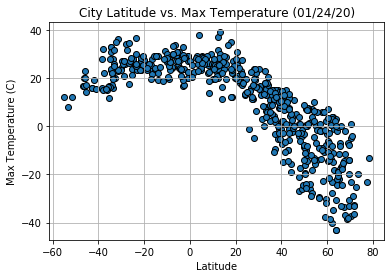

This scatter plot shows a strong correlation between temperature and latitude from over 500 randomly selected cities. Temperatures are highest near the equator and colder as you move away from the equator.


In [144]:
x_values = cities_df['lat']
y_values = cities_df['maxtemp']
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (01/24/20)') # figure out how to do date stamp here
plt.grid()
plt.savefig('images/City_Lat_vs_Max_Temp.png')
plt.show()
print("This scatter plot shows a strong correlation between temperature and latitude from over 500 randomly selected cities. Temperatures are highest near the equator and colder as you move away from the equator.")

#### Latitude vs. Humidity Plot

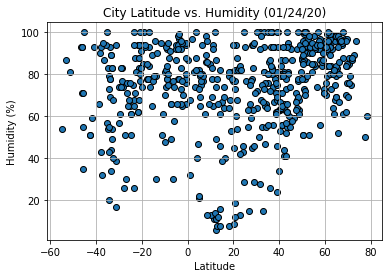

This scatter plot does not show strong correlation between humidity and latitude based on data from over 500 randomly selected cities. Higher levels of humidity are relatively spread out across all latitudes, with some clustering of higher humidity at higher latitudes.


In [145]:
x_values = cities_df['lat']
y_values = cities_df['humidity']
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (01/24/20)') # figure out how to do date stamp here
plt.grid()
plt.savefig('images/City_Lat_vs_Humidity.png')
plt.show()
print("This scatter plot does not show strong correlation between humidity and latitude based on data from over 500 randomly selected cities. Higher levels of humidity are relatively spread out across all latitudes, with some clustering of higher humidity at higher latitudes.")

#### Latitude vs. Cloudiness Plot

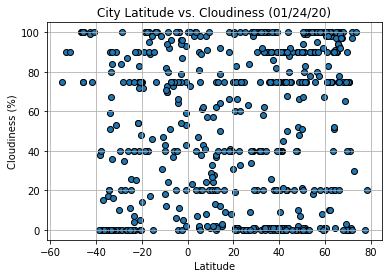

This scatter plot does not show strong correlation between cloudiness and latitude as all data points from over 500 randomly selected cities are spread out relatively evenly.


In [146]:
x_values = cities_df['lat']
y_values = cities_df['cloudiness'].astype('float') # check whats wrong with y axis labeling
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (01/24/20)') # figure out how to do date stamp here
plt.grid()
plt.savefig('images/City_Lat_vs_Cloudiness.png')
plt.show()
print("This scatter plot does not show strong correlation between cloudiness and latitude as all data points from over 500 randomly selected cities are spread out relatively evenly.")

#### Latitude vs. Wind Speed Plot

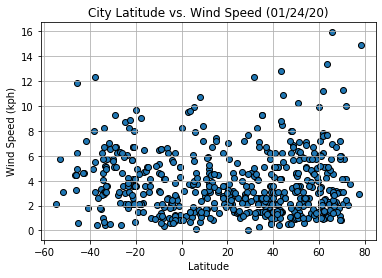

This scatter plot does now show strong correlation between wind speed and latitude as most cities have low wind speeds across all latitudes.


In [142]:
x_values = cities_df['lat']
y_values = cities_df['windspeed'] # check whats wrong with y axis labeling
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('City Latitude vs. Wind Speed (01/24/20)') # figure out how to do date stamp here
plt.grid()
plt.savefig('images/City_Lat_vs_Windspeed.png')
plt.show()
print("This scatter plot does now show strong correlation between wind speed and latitude as most cities have low wind speeds across all latitudes.")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [82]:
# Create Northern and Southern Hemisphere DataFrames
north_cities_df = cities_df.loc[cities_df['lat']>0]
north_cities_df

south_cities_df = cities_df.loc[cities_df['lat']<0]
south_cities_df

,city,cloudiness,country,date,humidity,lat,lng,maxtemp,windspeed
0,Faanui,17,PF,1579884368,74.0,-16.48,-151.75,28.00,6.50
2,Vaini,40,TO,1579884368,83.0,-21.20,-175.20,25.00,3.60
6,Santa Maria,40,BR,1579884368,61.0,-29.68,-53.81,27.00,5.10
8,Mataura,100,NZ,1579884278,93.0,-46.19,168.86,16.67,4.47
12,Rikitea,0,PF,1579884369,71.0,-23.12,-134.97,25.60,8.25
...,...,...,...,...,...,...,...,...,...
529,Neiafu,40,TO,1579884426,94.0,-18.65,-173.98,24.00,2.10
545,Vanimo,96,PG,1579884428,77.0,-2.67,141.30,28.14,2.81
553,Hualmay,31,PE,1579884429,51.0,-11.10,-77.61,27.74,5.21
559,Jutai,100,BR,1579884429,87.0,-5.18,-68.90,27.07,1.78


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8459003034095431


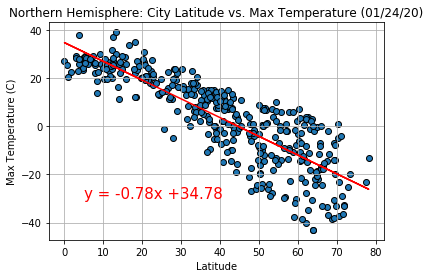

In [122]:
# define x and y values
x_values = north_cities_df['lat']
y_values = north_cities_df['maxtemp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature (01/24/20)') # figure out how to do date stamp here
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

plt.grid()
plt.savefig('images/NORTH_City_Lat_vs_Max_Temp_REGRESS.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4269502255240422


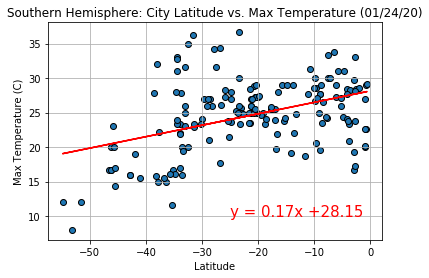

In [123]:
# define x and y values
x_values = south_cities_df['lat']
y_values = south_cities_df['maxtemp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature (01/24/20)') # figure out how to do date stamp here
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

plt.grid()
plt.savefig('images/SOUTH_City_Lat_vs_Max_Temp_REGRESS.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38200561323891885


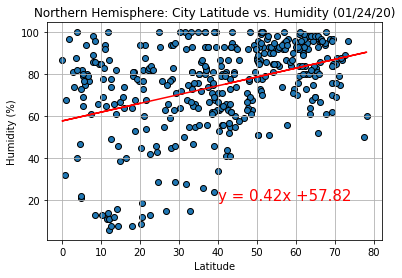

In [124]:
# define x and y values
x_values = north_cities_df['lat']
y_values = north_cities_df['humidity']

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: City Latitude vs. Humidity (01/24/20)') # figure out how to do date stamp here
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

plt.grid()
plt.savefig('images/NORTH_City_Lat_vs_Humidity_REGRESS.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2309042507879739


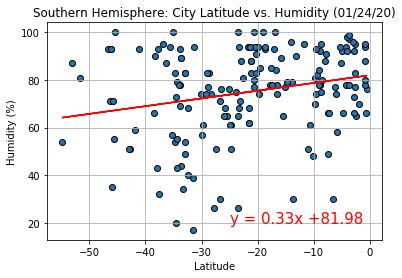

In [125]:
# define x and y values
x_values = south_cities_df['lat']
y_values = south_cities_df['humidity']

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: City Latitude vs. Humidity (01/24/20)') # figure out how to do date stamp here
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

plt.grid()
plt.savefig('images/SOUTH_City_Lat_vs_Humidity_REGRESS.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19521387805931695


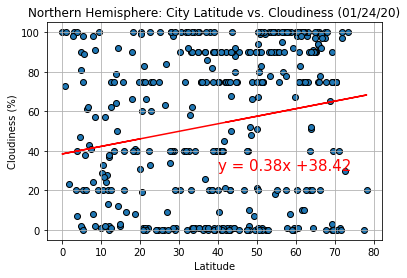

In [126]:
# define x and y values
x_values = north_cities_df['lat']
y_values = north_cities_df['cloudiness'].astype('float')

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness (01/24/20)') # figure out how to do date stamp here
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

plt.grid()
plt.savefig('images/NORTH_City_Lat_vs_Cloudiness_REGRESS.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09717040988961571


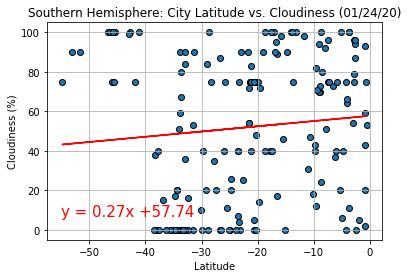

In [127]:
# define x and y values
x_values = south_cities_df['lat']
y_values = south_cities_df['cloudiness'].astype('float')

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (01/24/20)') # figure out how to do date stamp here
plt.annotate(line_eq,(-55,7),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

plt.grid()
plt.savefig('images/SOUTH_City_Lat_vs_Cloudiness_REGRESS.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07686539945443584


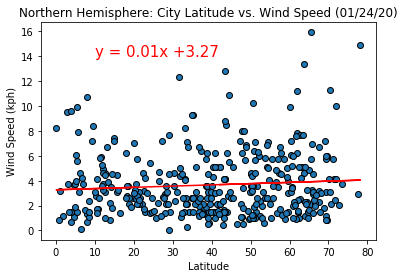

In [141]:
# define x and y values
x_values = north_cities_df['lat']
y_values = north_cities_df['windspeed']

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed (01/24/20)') # figure out how to do date stamp here
plt.annotate(line_eq,(10,14),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#plt.grid()
plt.savefig('images/NORTH_City_Lat_vs_Windspeed_REGRESS.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.27070547711842957


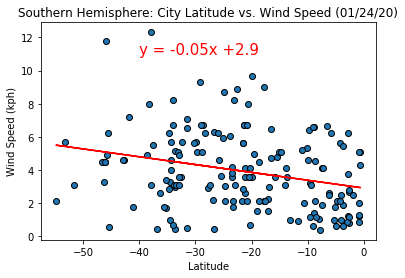

In [140]:
# define x and y values
x_values = south_cities_df['lat']
y_values = south_cities_df['windspeed']

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed (01/24/20)') # figure out how to do date stamp here
plt.annotate(line_eq,(-40,11),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#plt.grid()
plt.savefig('images/SOUTH_City_Lat_vs_Windspeed_REGRESS.png')
plt.show()